In [1]:
import functions
import importlib
importlib.reload(functions)
from functions import *

In [2]:
# 读取data文件夹中的文件
for file in os.listdir('data'):
    if 'who' in file and '乱码' not in file:
        # 根据文件名获取年份
        year = file.split('_')[1][:4]
        # 对于2021年的文件，需要读取第二个工作表，每一个人的信息为一行
        if year == '2021':
            sheet_name = 1
        else:
            sheet_name = 0
        globals()['df_'+year] = pd.read_excel('data/' + file, sheet_name=sheet_name)
        globals()['df_'+year]['入学年份'] = year
# 将各个文件的列名统一后再合并
globals()['df_2020'].columns = ['姓名', '性别', '星座', '本科毕业院校', '本科专业', '兴趣爱好', '家乡', '喜欢的课程',
                                '最喜欢的书', '最喜欢的电影', '最喜欢的食物', '疫情结束后最想去的地方',
                                '自我介绍', '入学年份']
globals()['df_2021'].columns = ['姓名', '学号', '英文名', '邮箱', '手机', '微信号', 'Facebook', '星座', '本科毕业院校',
                                '本科专业', '兴趣爱好', '最喜欢的书', '最喜欢的电影', '最喜欢的食物', '去过令你印象最深刻的地方',
                                '疫情结束后最想去的地方', '疫情体重变化', '独自一人的时候喜欢做什么',
                                '最喜欢的明星或艺术家', '最喜欢的歌', '是否有宠物', '睡过最久的一次觉是多久',
                                '喜欢猫还是喜欢狗？', '自我介绍', '入学年份']
globals()['df_2022'].columns = ['姓名', '星座', '本科毕业院校', '本科是否在上海', '本科专业', '兴趣爱好', '最喜欢的书', '最喜欢的电影', '最喜欢的食物',
                                '去过令你印象最深刻的地方', '最不喜欢的事物', '疫情结束后最想去的地方',
                                '疫情体重变化', '独自一人的时候喜欢做什么', '最喜欢的明星或艺术家',
                                '最喜欢的歌', '是否有宠物', '睡过最久的一次觉是多久', '是否经历过隔离以及当时在做什么', '是否经历过隔离',
                                '是否做过志愿者（文本）', '是否做过志愿者', '足不出户的时间是几天', '最常用的看社交或短视频软件是哪个', '是Up主吗',
                                '手机里最奇葩的APP软件', '只有你有别人没有经历过的事情', '说一件你从来没有做过但大多数人都做过的事情', '给自己会颁什么奖',
                                '常玩的游戏是什么以及你的段位或等级是多少', '如果可以选择想拥有什么超能力', '神经最大的投资亏了多少',
                                '你有什么不能碰的食物', '在管院必须要完成的一件事或实现的一个愿望', '朋友或同学给你起过的外号', '自我介绍', '入学年份']
# 合并
df = pd.concat(globals()['df_' + str(i)] for i in range(2020, 2023))
# 挑选出需要的列
used_columns = [ '入学年份', '姓名', '星座', '本科毕业院校', '本科是否在上海', '本科专业', '兴趣爱好', '最喜欢的书', '最喜欢的电影', '最喜欢的食物',
                 '去过令你印象最深刻的地方', '疫情结束后最想去的地方',
                 '疫情体重变化', '独自一人的时候喜欢做什么', '最喜欢的明星或艺术家',
                 '最喜欢的歌', '是否有宠物', '睡过最久的一次觉是多久', '是否经历过隔离',
                 '是否做过志愿者', '足不出户的时间是几天', '最常用的看社交或短视频软件是哪个', '是Up主吗',
                 '只有你有别人没有经历过的事情', '说一件你从来没有做过但大多数人都做过的事情', '给自己会颁什么奖',
                 '常玩的游戏是什么以及你的段位或等级是多少', '如果可以选择想拥有什么超能力', '神经最大的投资亏了多少',
                 '你有什么不能碰的食物', '在管院必须要完成的一件事或实现的一个愿望', '朋友或同学给你起过的外号', '自我介绍']
# 只保留需要的列
df = df[used_columns]
# 保存到本地
df.to_excel('data/df.xlsx', index=False)

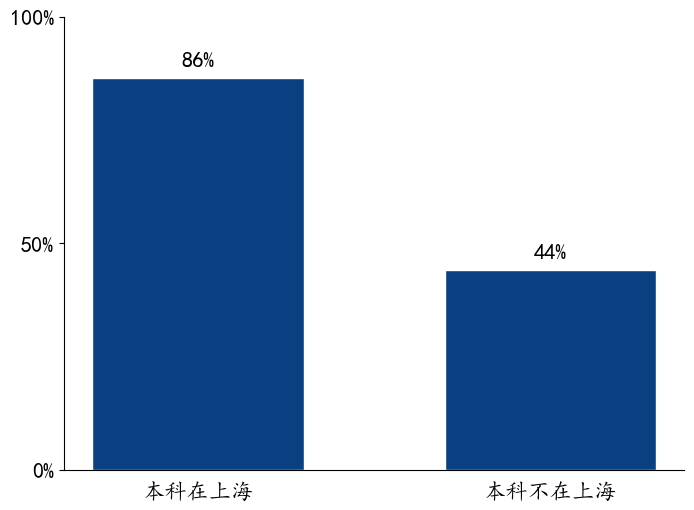

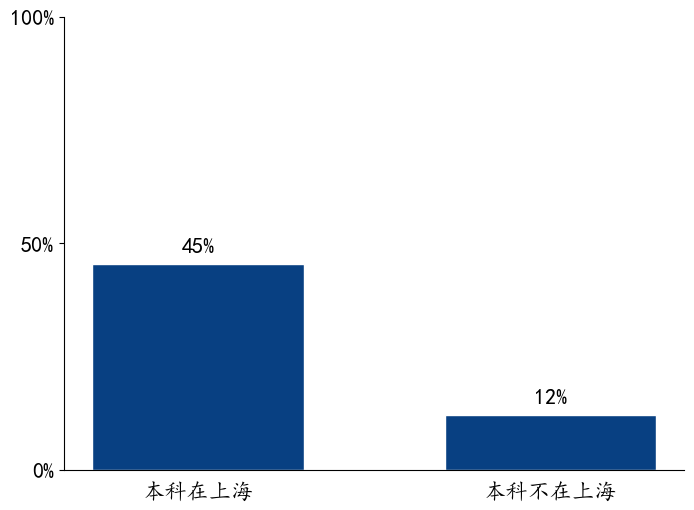

In [3]:
# 是否经历过隔离或做过志愿者
df_2022 = df[df['入学年份']=='2022']
blocked = pd.DataFrame({'本科在上海':[df_2022[df_2022['本科是否在上海']==1]['是否经历过隔离'].mean(), df_2022[df_2022['本科是否在上海']==1]['是否做过志愿者'].mean()],
                  '本科不在上海':[df_2022[df_2022['本科是否在上海']==0]['是否经历过隔离'].mean(), df_2022[df_2022['本科是否在上海']==0]['是否做过志愿者'].mean()]})
blocked.index=['是否经历过隔离', '是否做过志愿者']
isolation_volunteer(blocked, '是否经历过隔离')
isolation_volunteer(blocked, '是否做过志愿者')

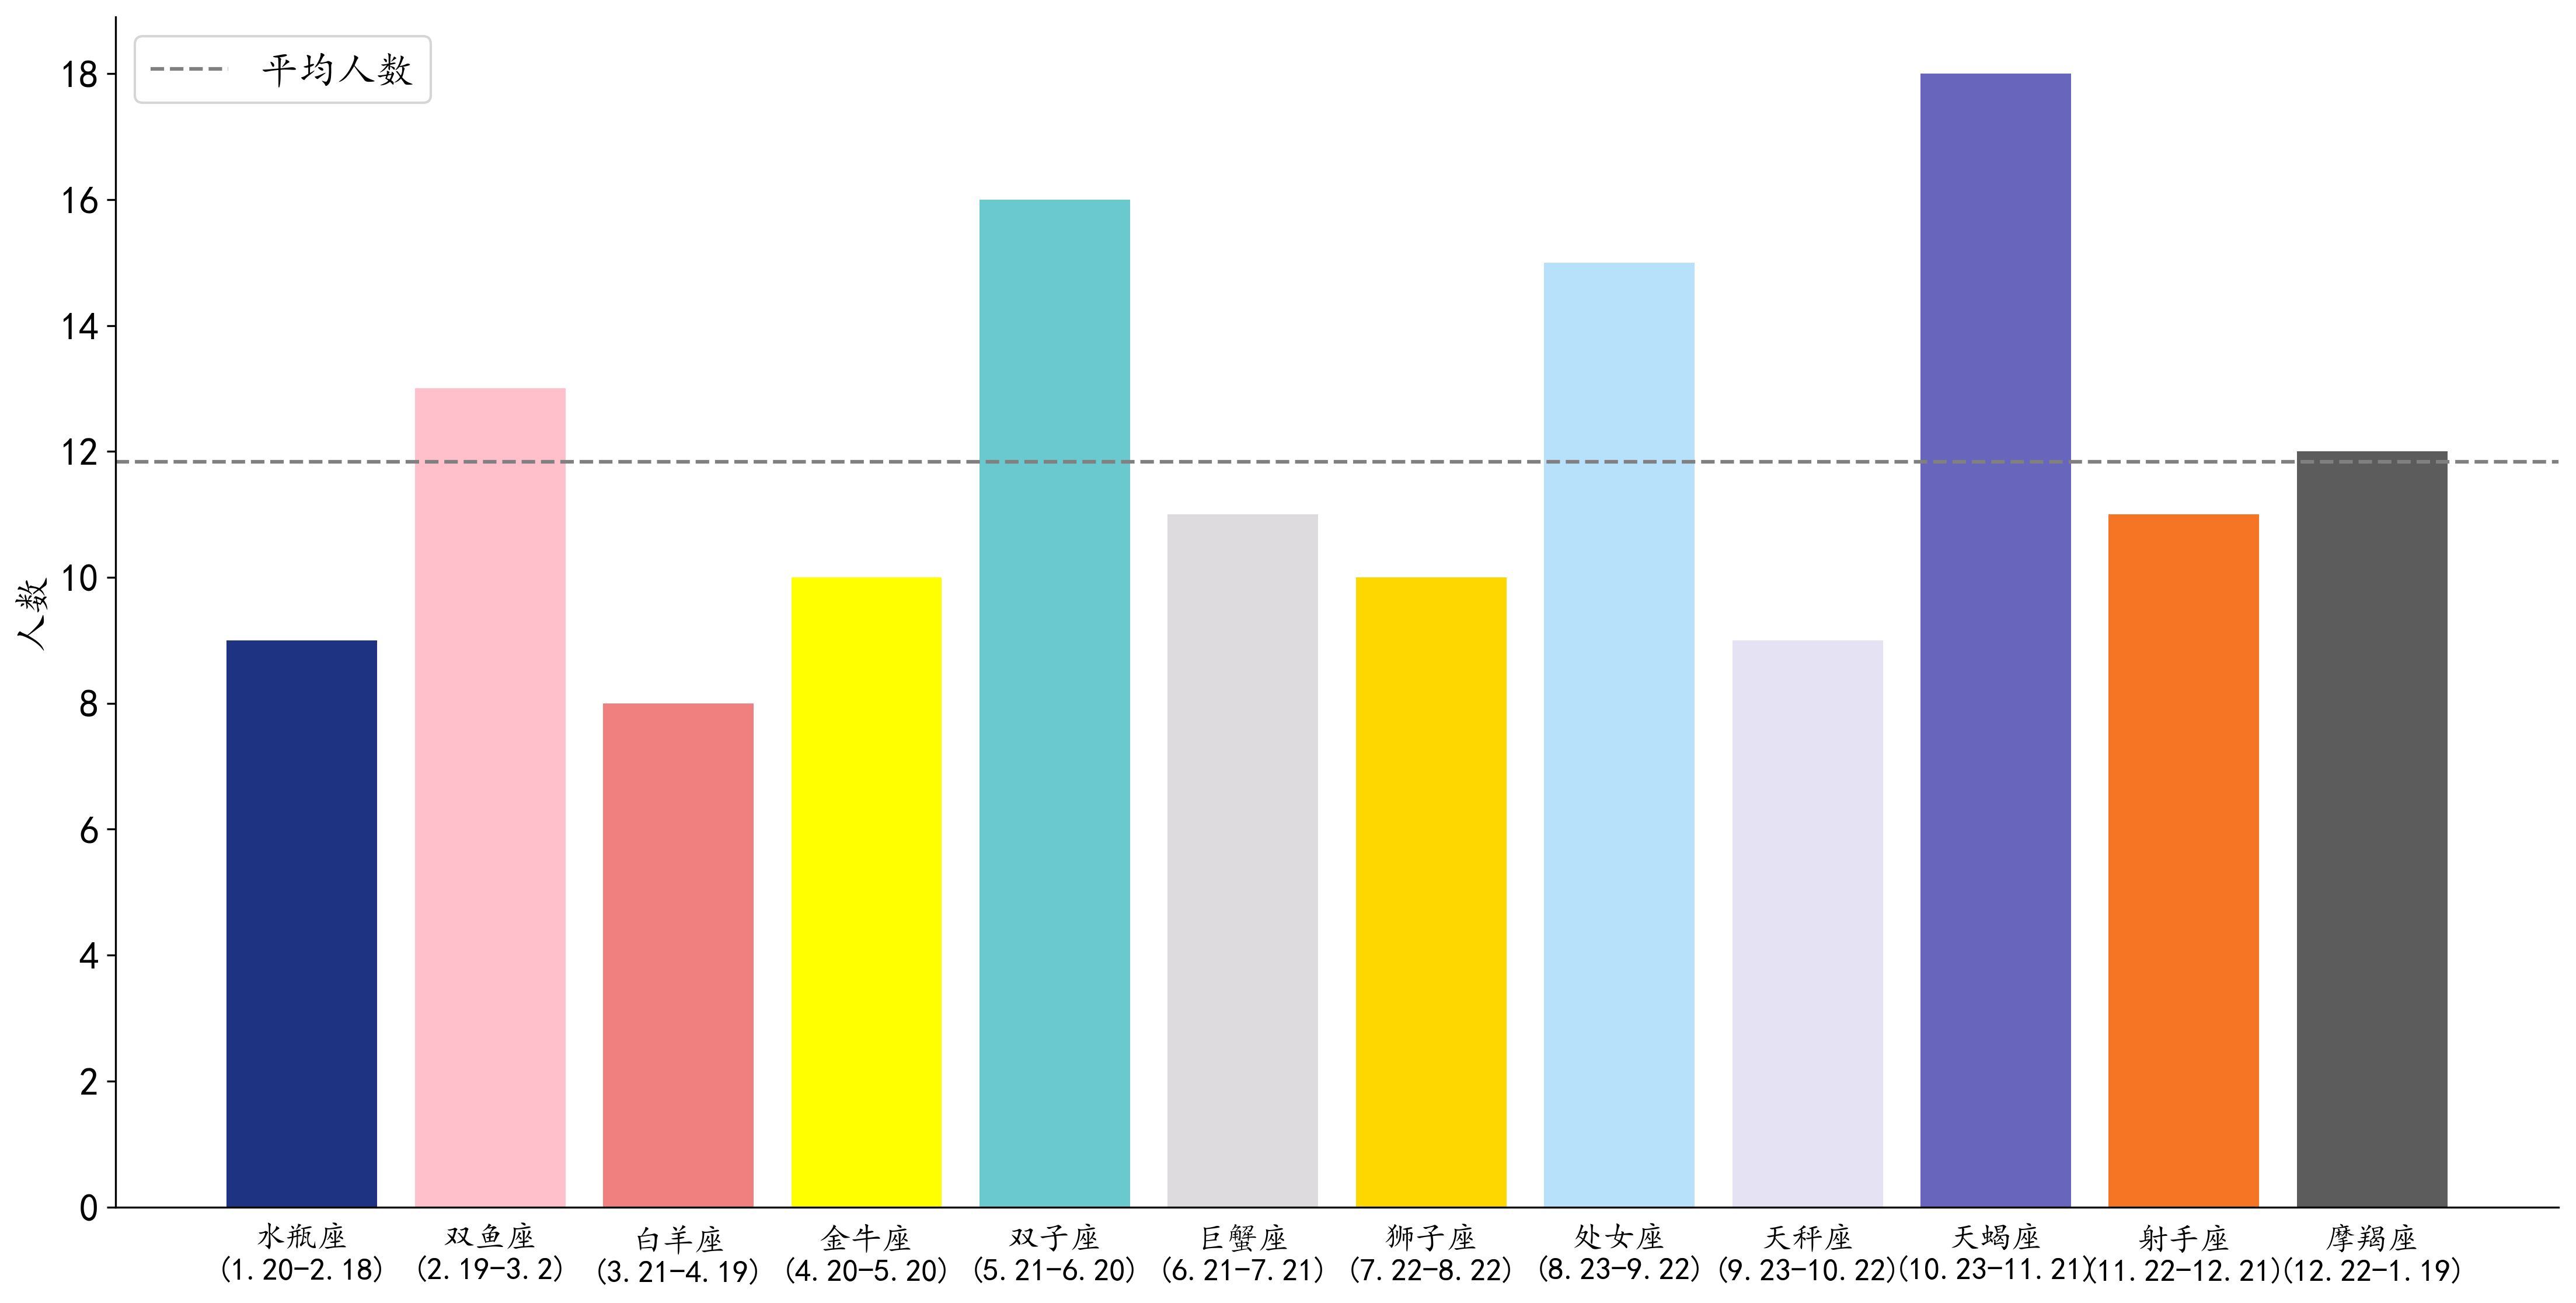

In [4]:
# =====星座柱状图=====
draw_constellations(df)

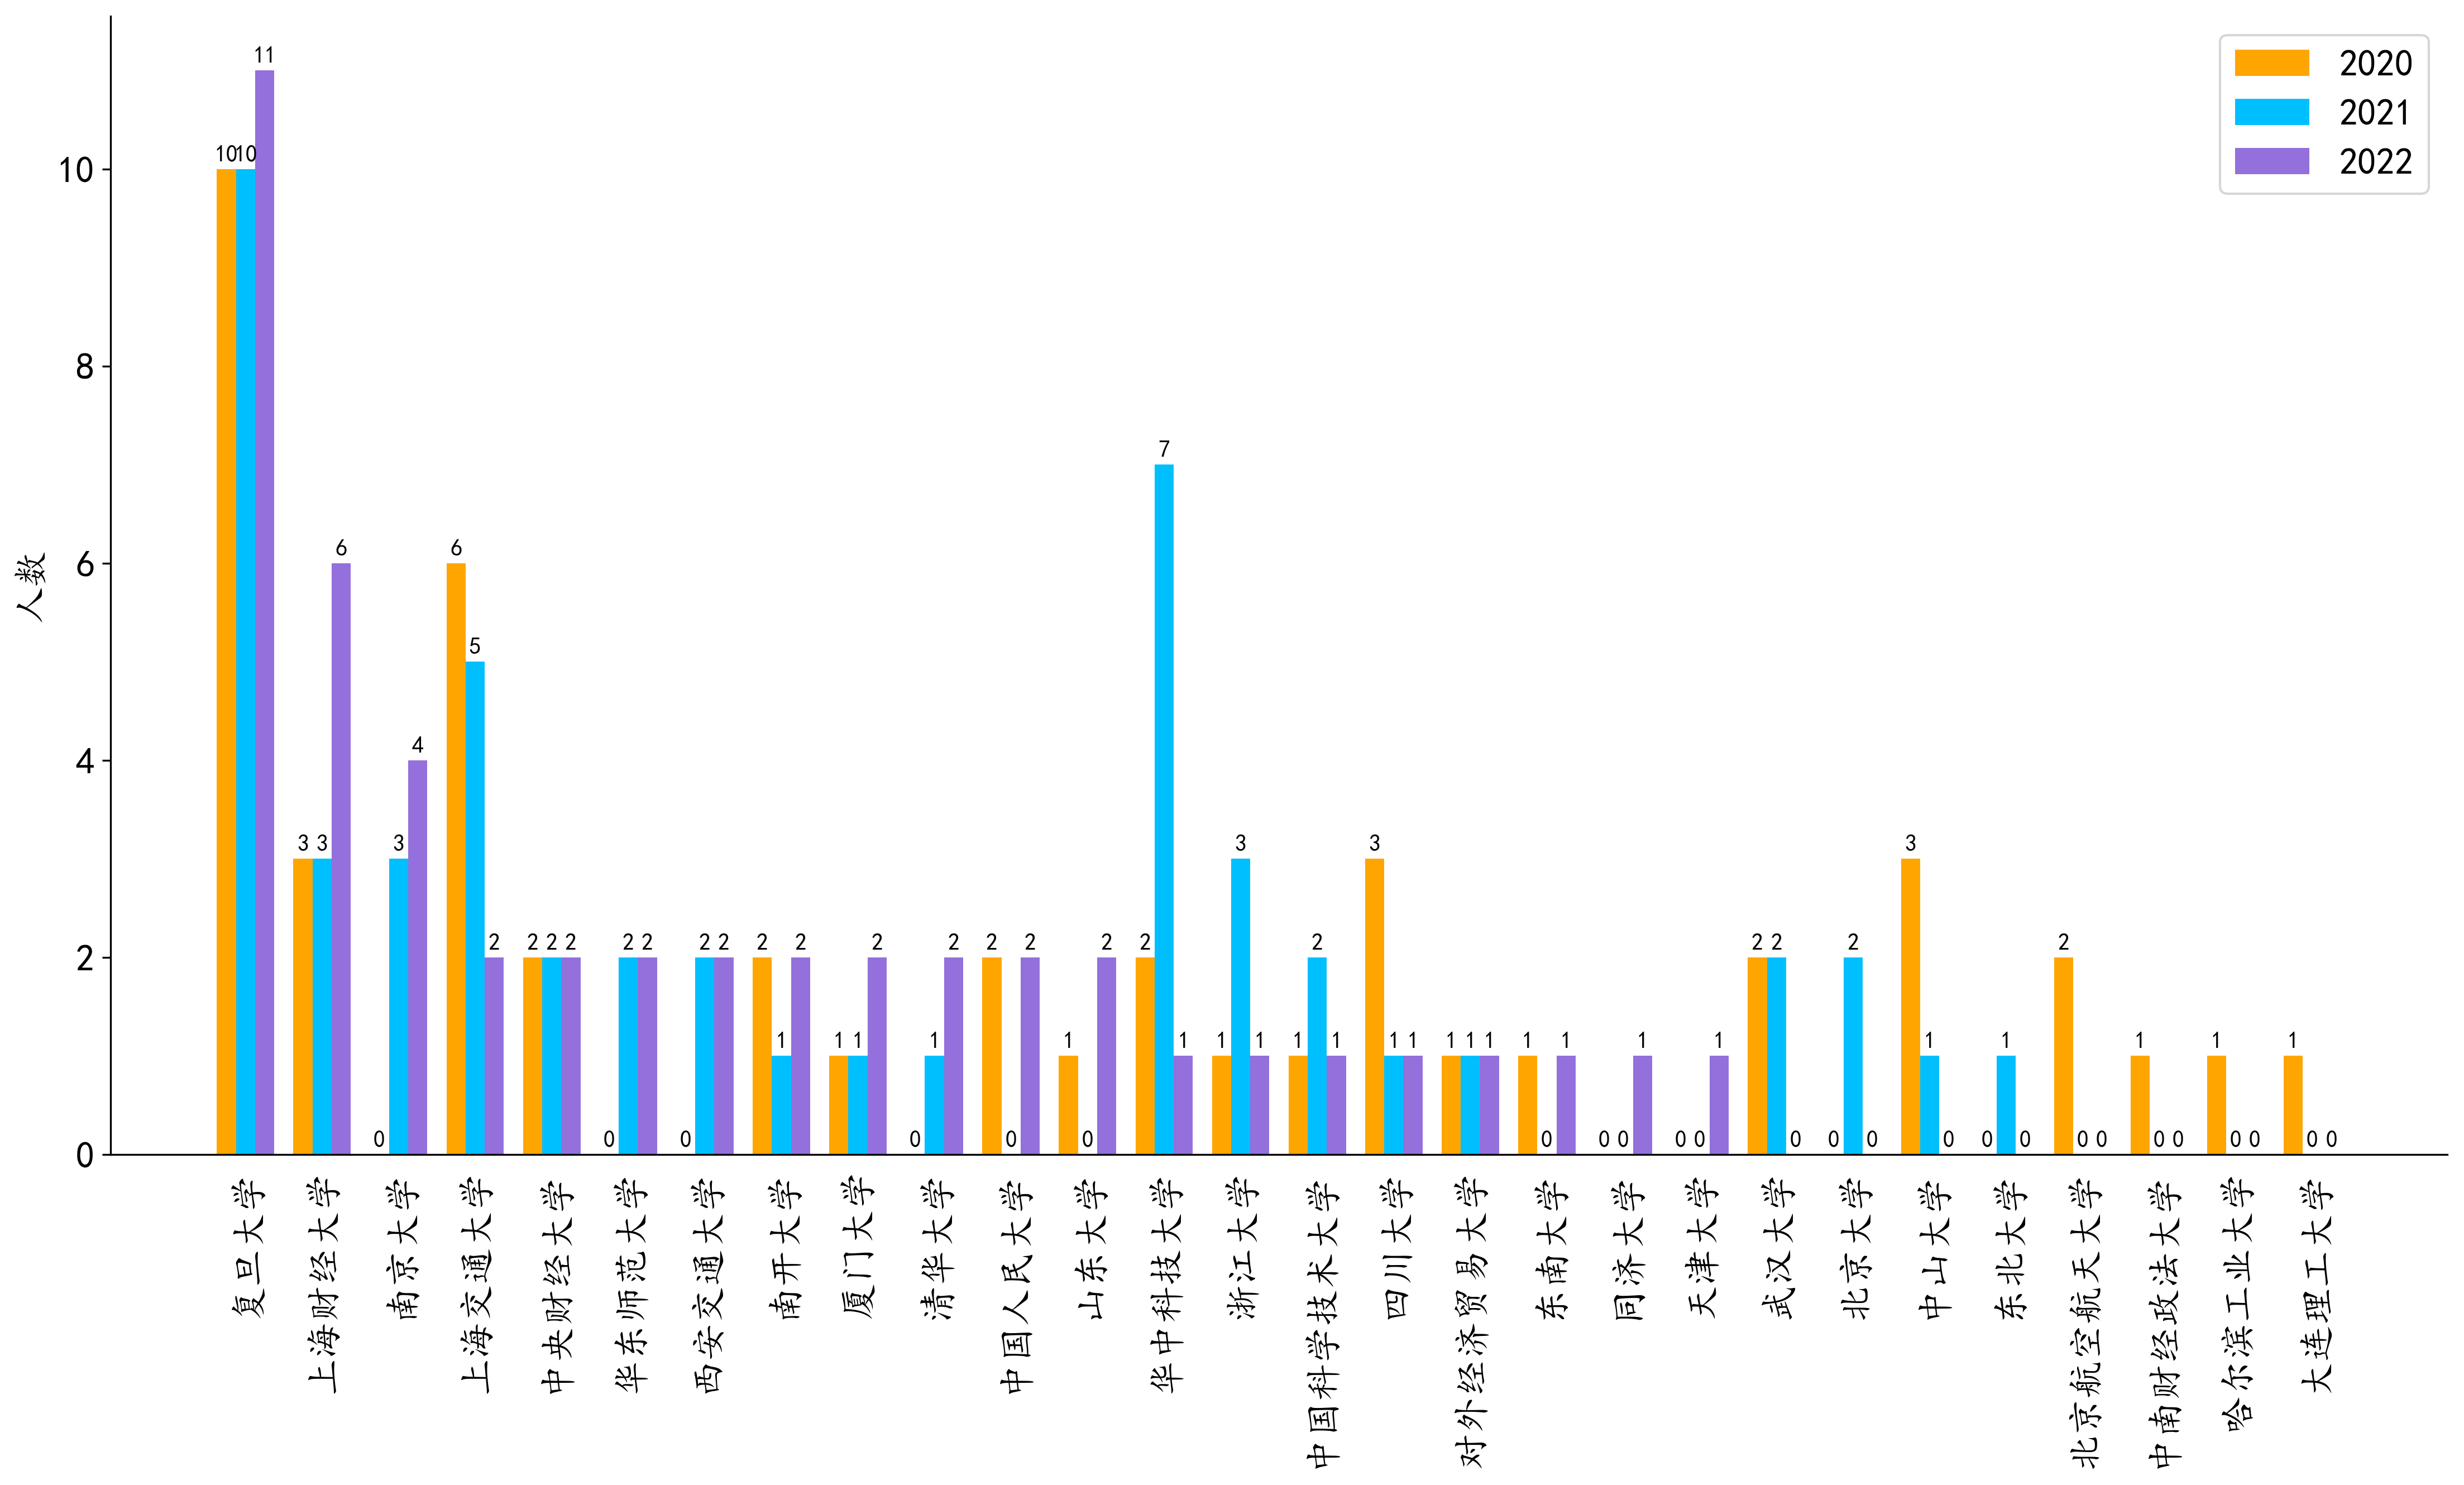

In [5]:
# =====本科毕业院校柱状图=====
draw_undergraduate_university(df)

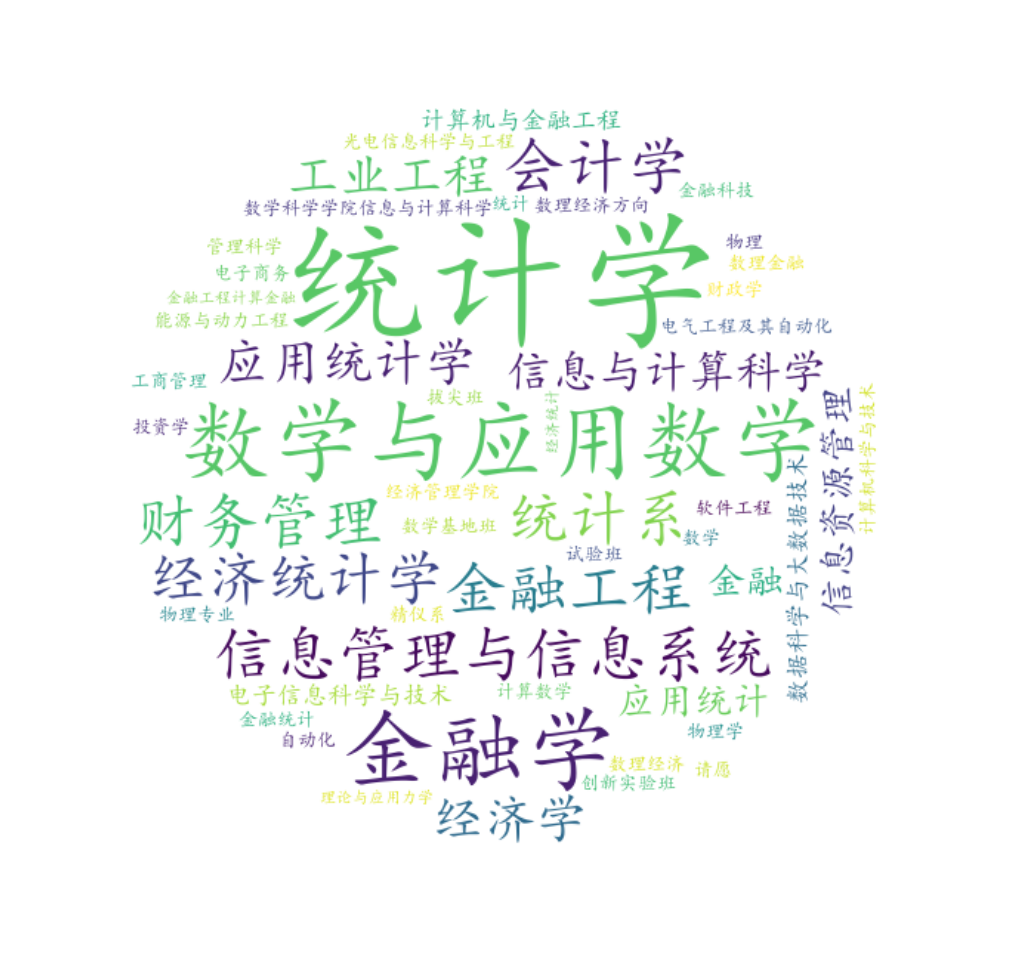

In [6]:
# =====绘制本科专业词云图=====
df['本科专业'].to_csv(r'.\data\undergraduate_major.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\undergraduate_major.txt', output_path=r'.\output\本科专业词云图.png')

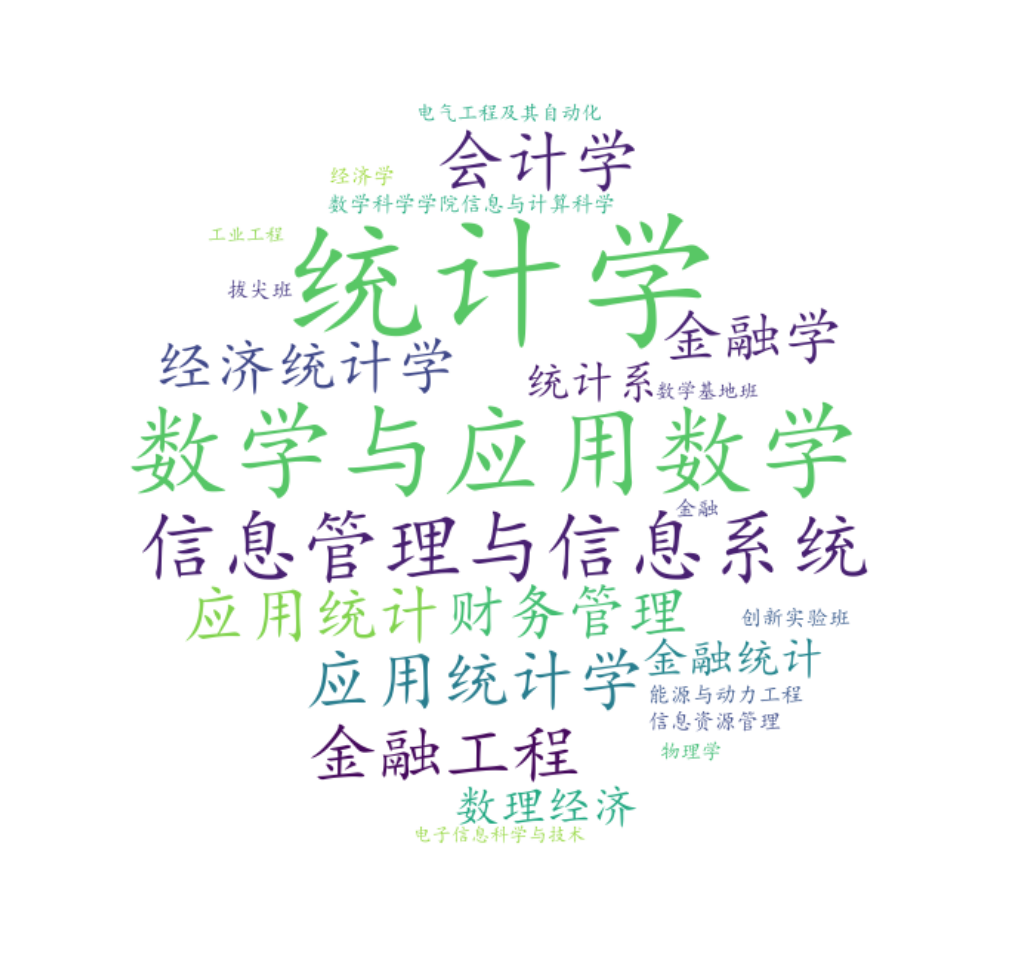

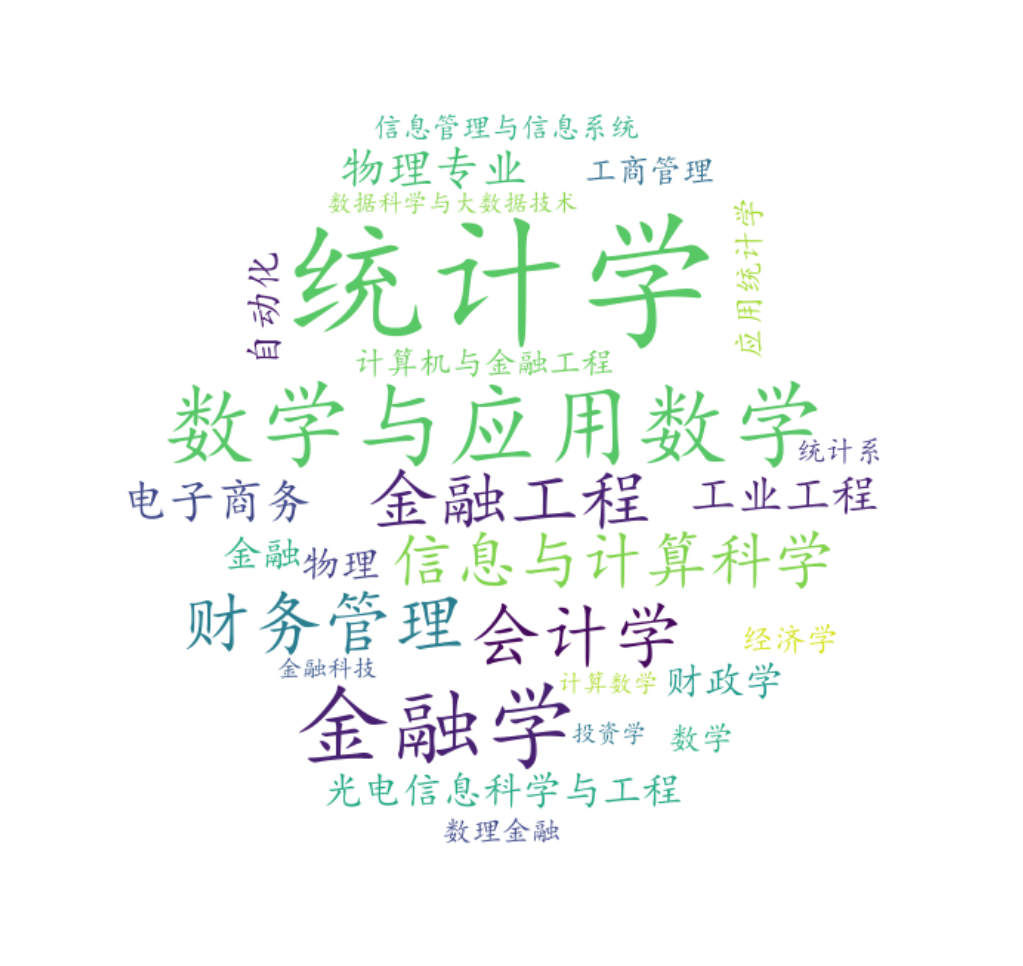

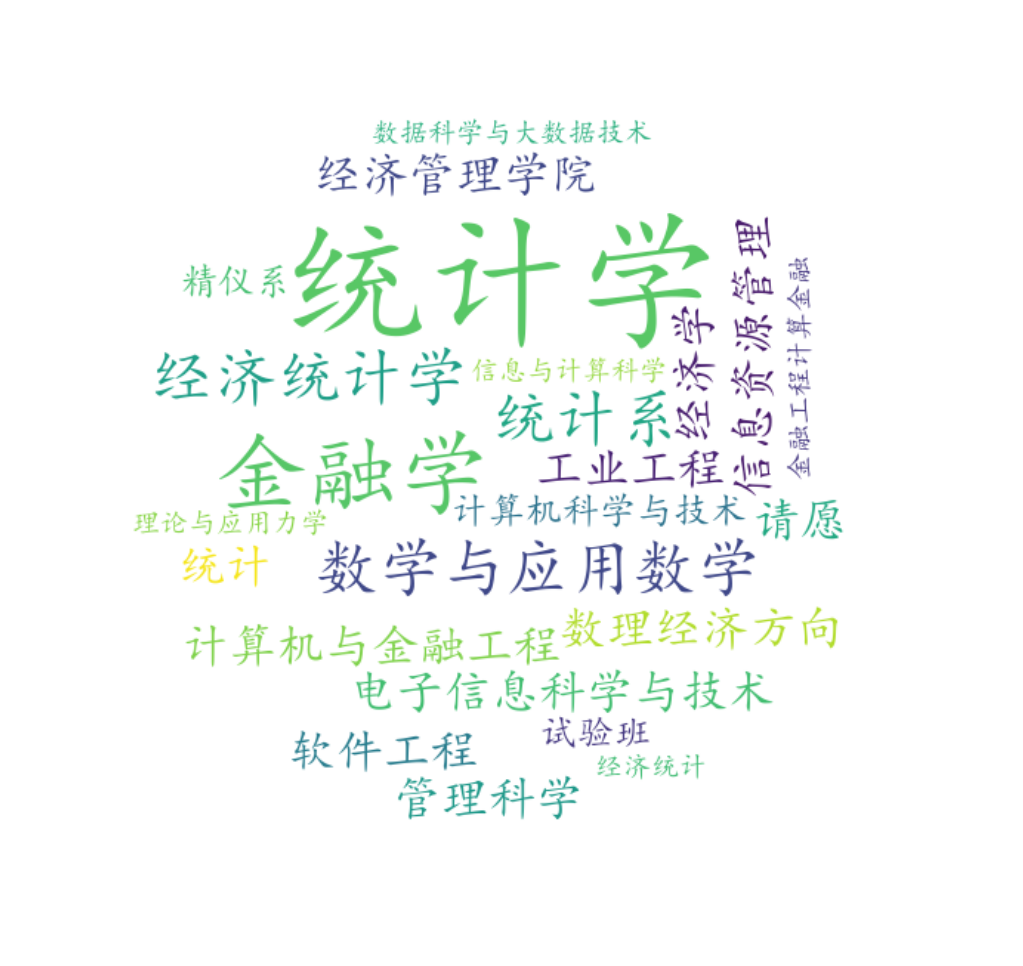

In [7]:
# =====绘制各年度年本科专业词云图=====
for year in ['2020', '2021', '2022']:
    df[df['入学年份']==year]['本科专业'].to_csv(r'.\data\undergraduate_major_{}.txt'.format(year), index=False, header=False)
    draw_word_cloud(text_path=r'.\data\undergraduate_major_{}.txt'.format(year), output_path=r'.\output\{}年本科专业词云图.png'.format(year))

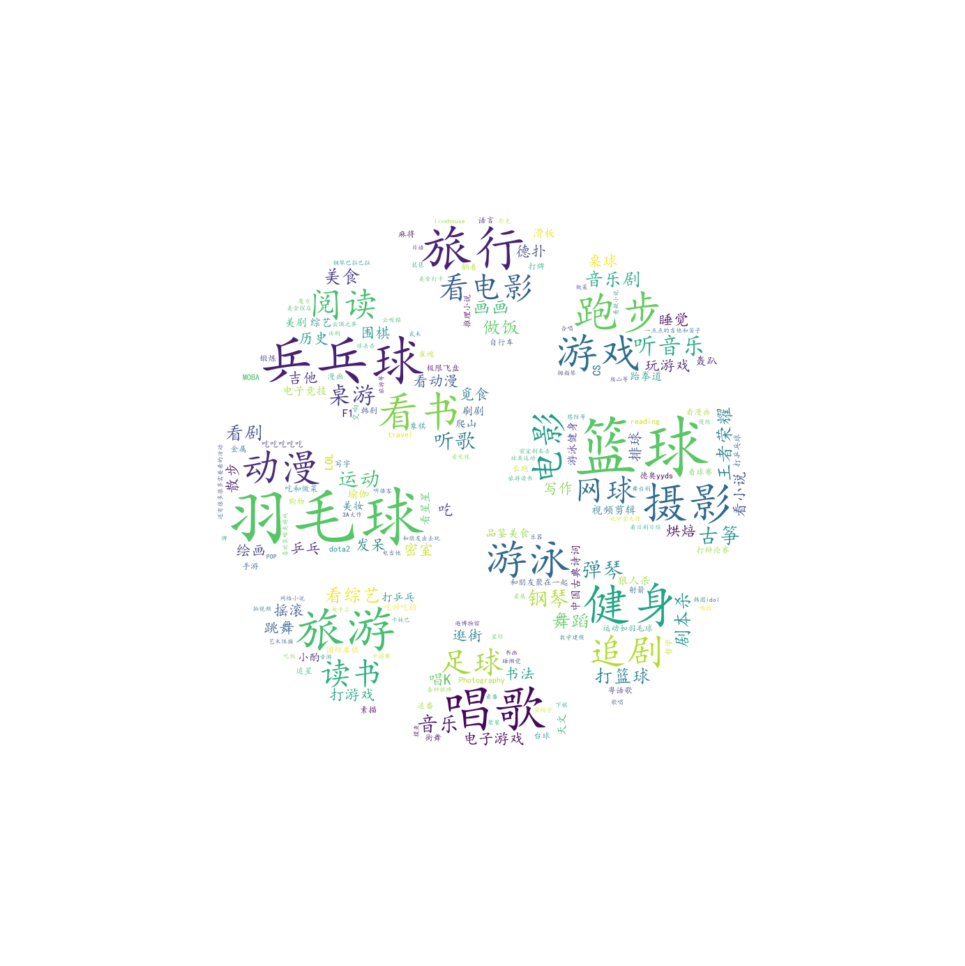

In [8]:
# =====绘制兴趣爱好词云图=====
df['兴趣爱好'].to_csv(r'.\data\hobby.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\hobby.txt', output_path=r'.\output\兴趣爱好词云图.png', outline_image_path = imread(r'.\data\篮球.png'))

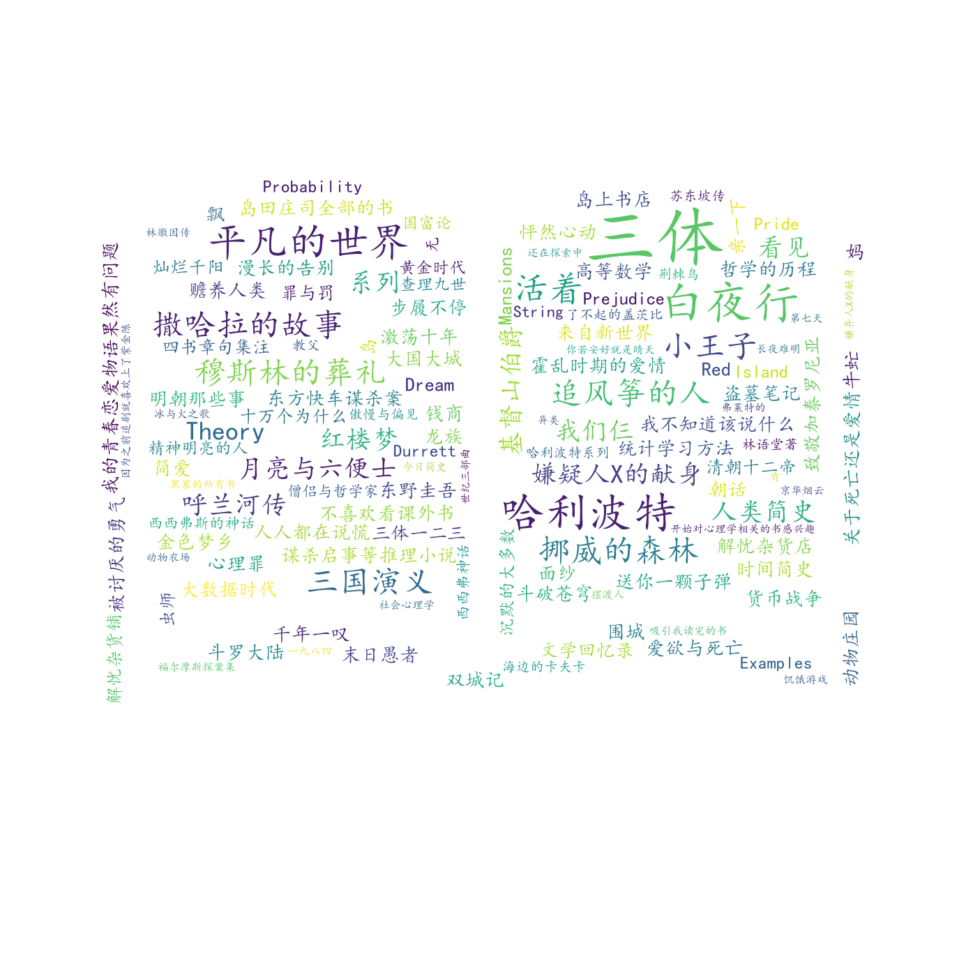

In [9]:
# =====绘制最喜欢的书词云图=====
df['最喜欢的书'].to_csv(r'.\data\favorite_book.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\favorite_book.txt', output_path=r'.\output\最喜欢的书.png', outline_image_path = imread(r'.\data\书本.png'))

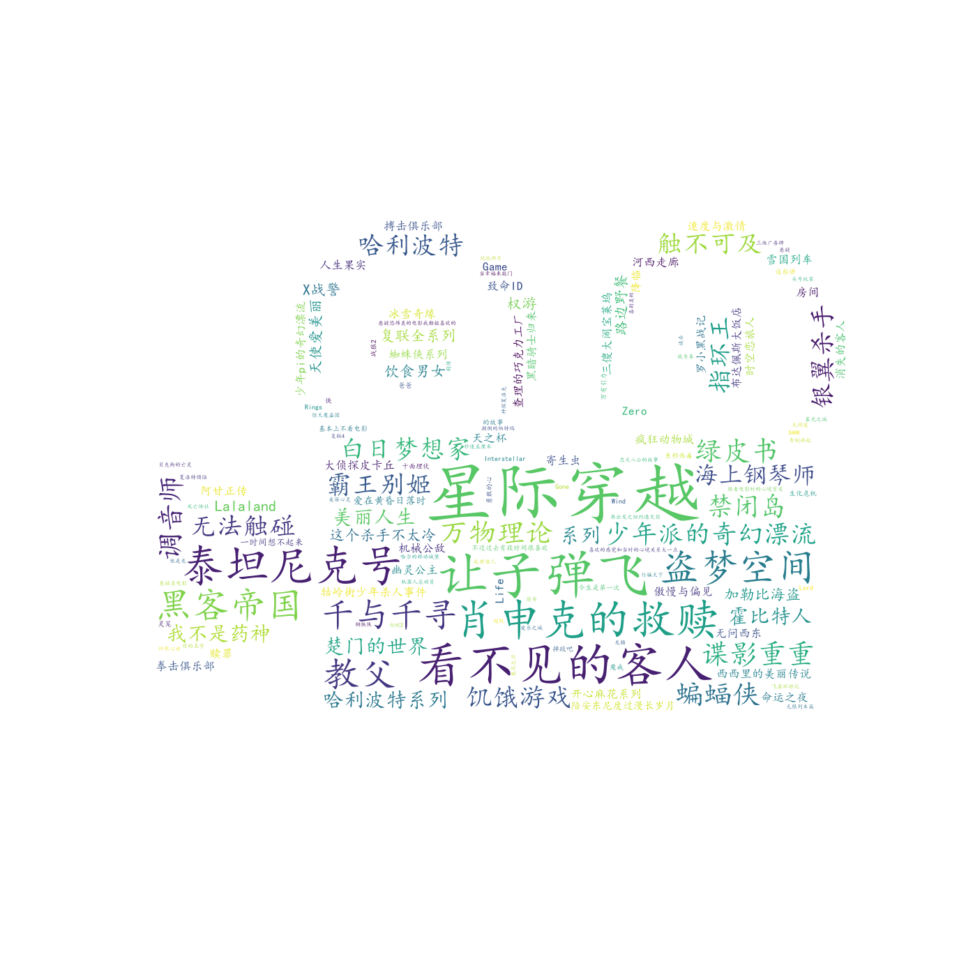

In [10]:
# =====绘制最喜欢的电影词云图=====
df['最喜欢的电影'].to_csv(r'.\data\favorite_movie.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\favorite_movie.txt', output_path=r'.\output\最喜欢的电影.png', outline_image_path = imread(r'.\data\电影.png'))

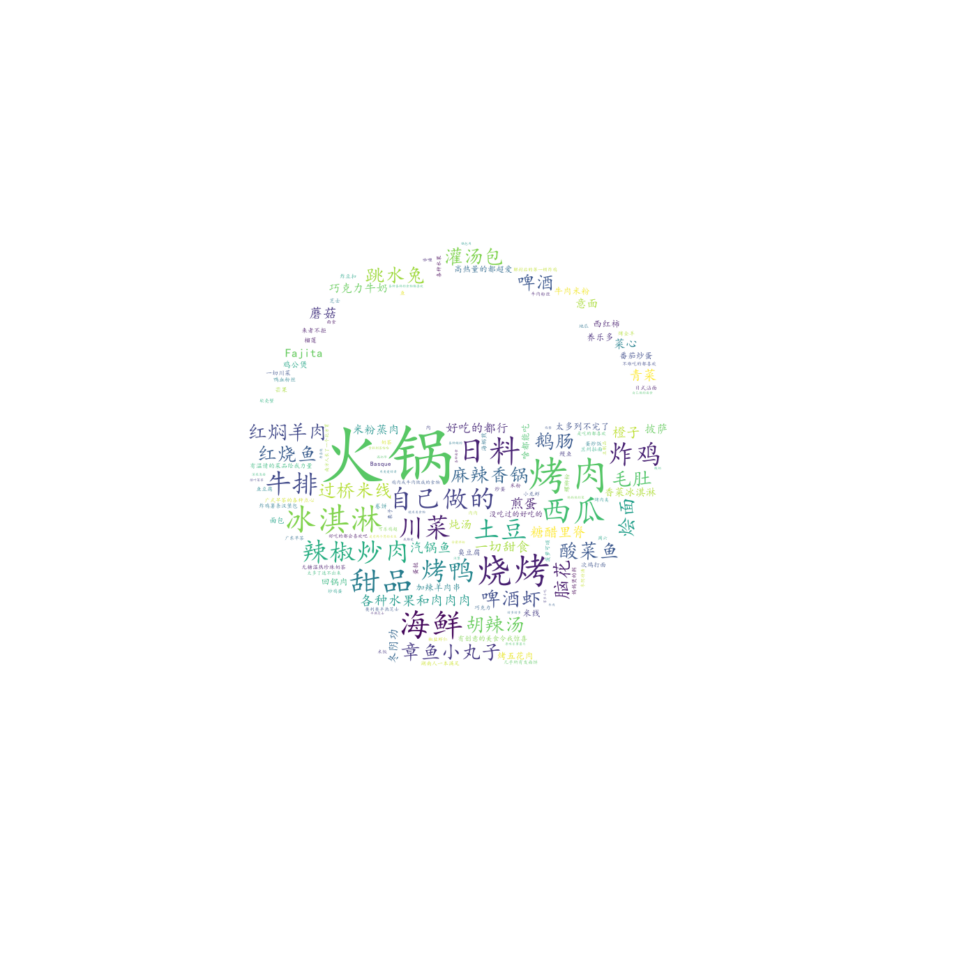

In [11]:
# =====绘制最喜欢的食物词云图=====
df['最喜欢的食物'].to_csv(r'.\data\favorite_food.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\favorite_food.txt', output_path=r'.\output\最喜欢的食物.png', outline_image_path = imread(r'.\data\食物.jpg'))

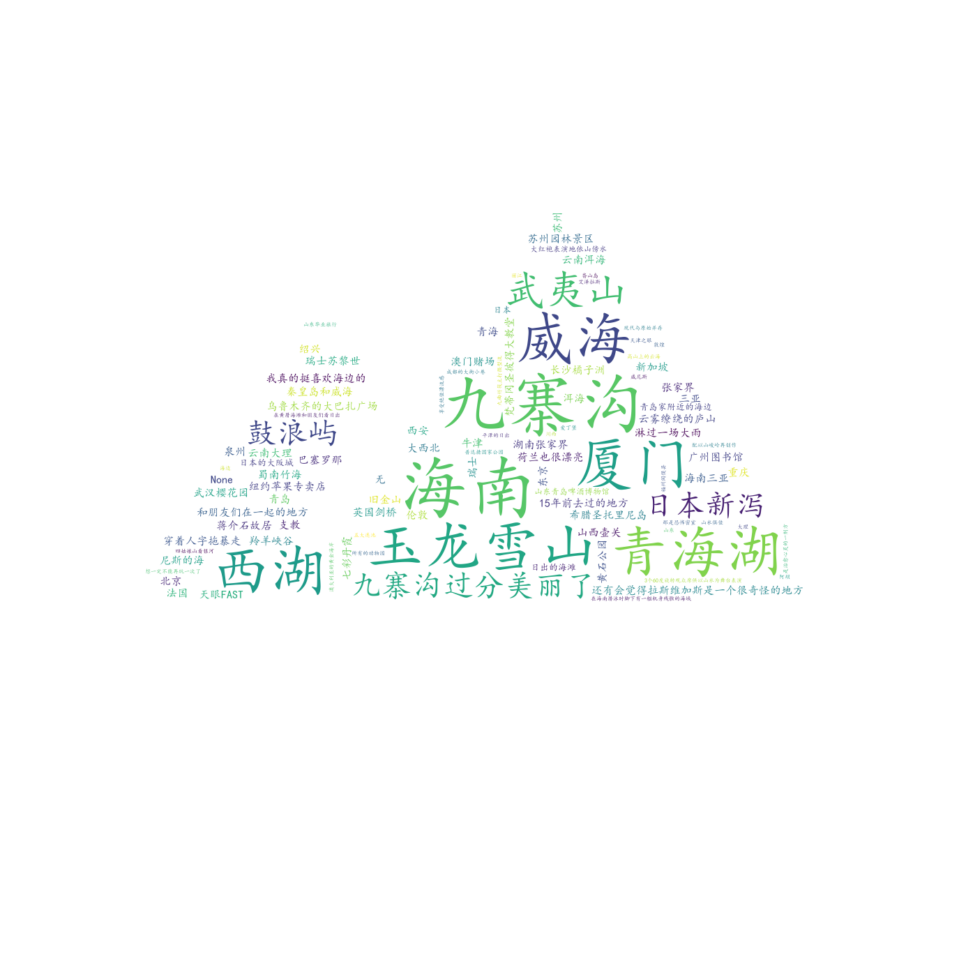

In [12]:
# =====绘制去过令你印象最深刻的地方词云图=====
df['去过令你印象最深刻的地方'].to_csv(r'.\data\most_impressing_place.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\most_impressing_place.txt', output_path=r'.\output\去过令你印象最深刻的地方.png', outline_image_path = imread(r'.\data\山脉.jpg'))

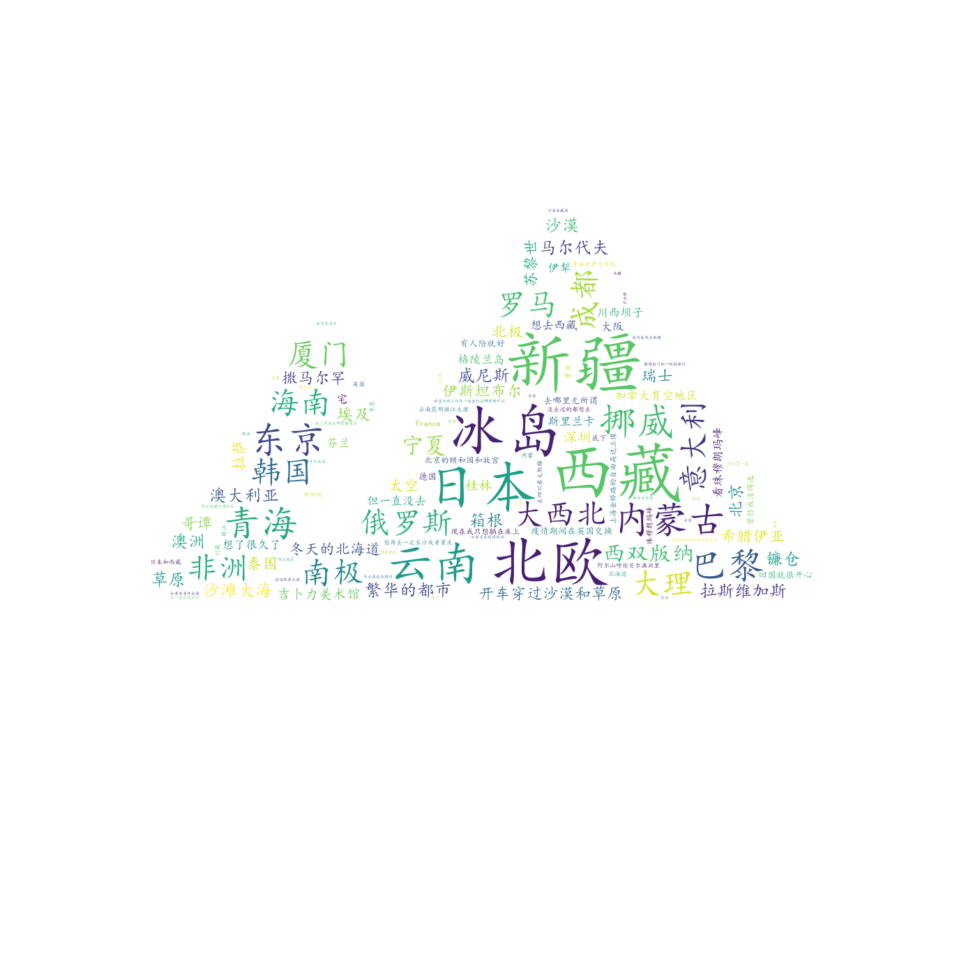

In [13]:
# =====绘制疫情结束后最想去的地方词云图=====
df['疫情结束后最想去的地方'].to_csv(r'.\data\most_attractive_place.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\most_attractive_place.txt', output_path=r'.\output\疫情结束后最想去的地方.png', outline_image_path = imread(r'.\data\山脉.jpg'))

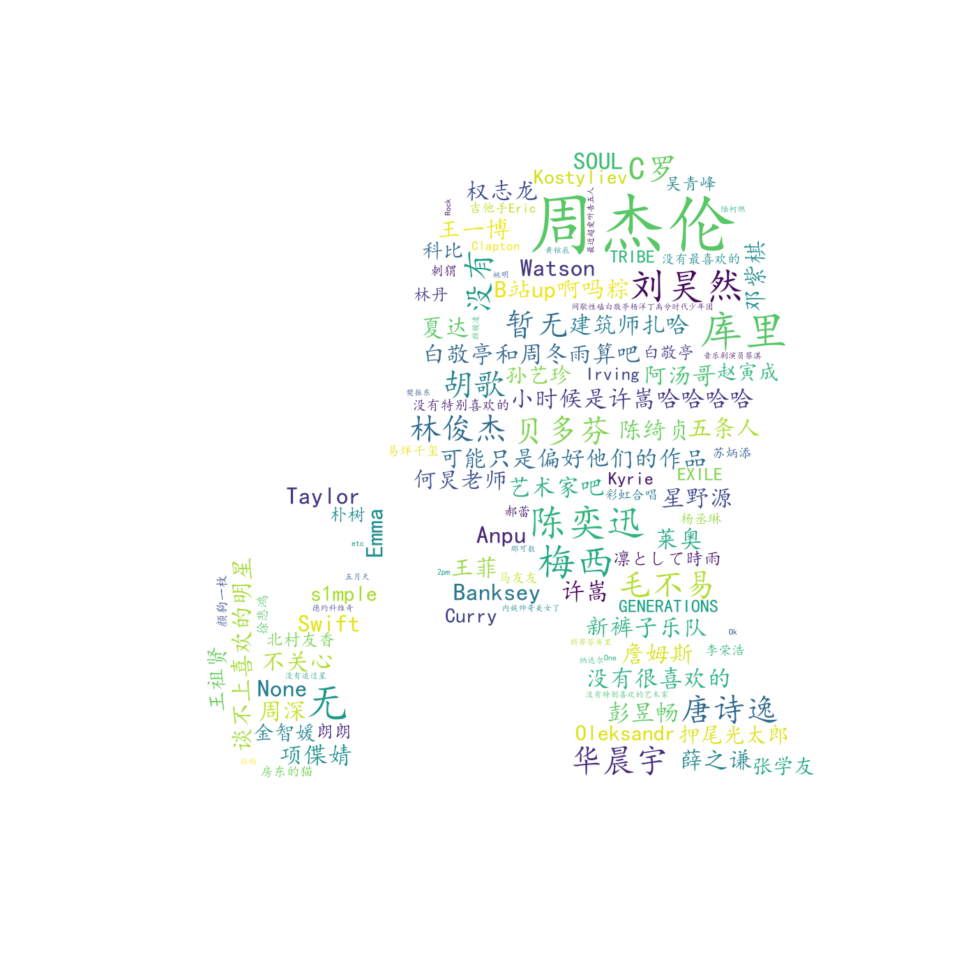

In [14]:
# =====绘制最喜欢的明星或艺术家词云图=====
df['最喜欢的明星或艺术家'].to_csv(r'.\data\favorite_artist.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\favorite_artist.txt', output_path=r'.\output\最喜欢的明星或艺术家.png', outline_image_path = imread(r'.\data\明星.jpg'))

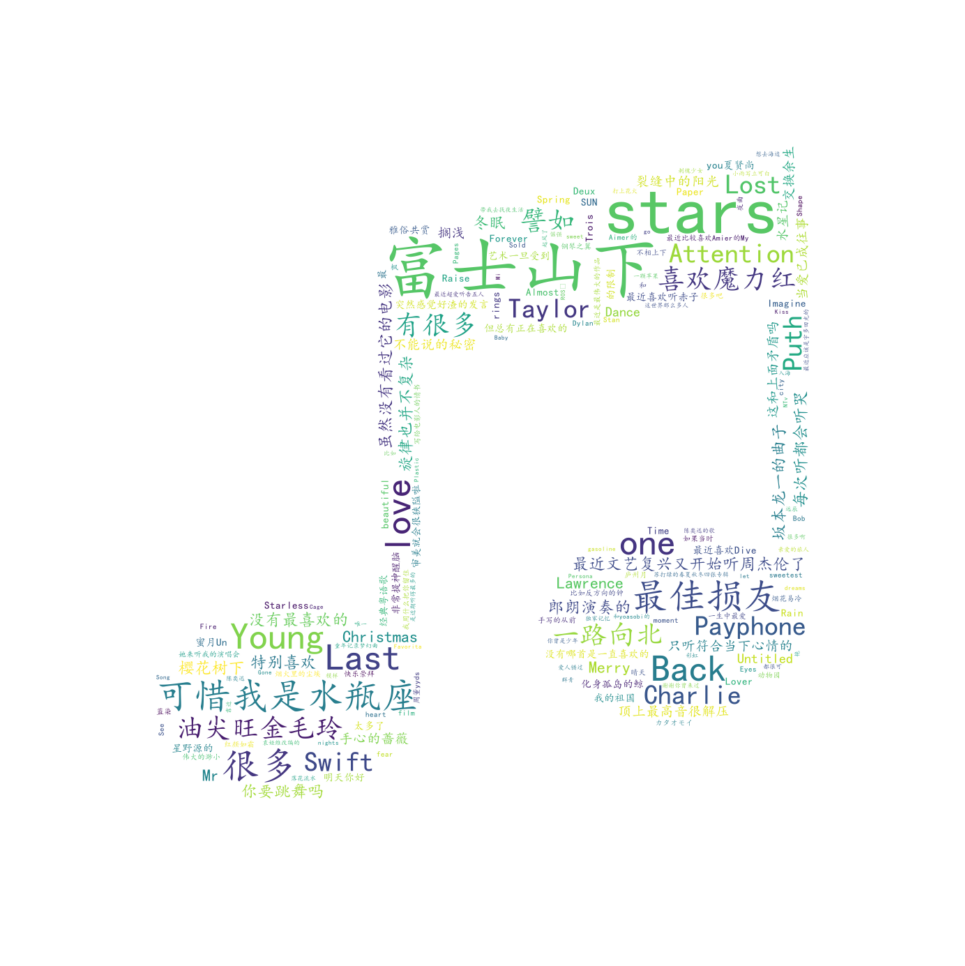

In [15]:
# =====绘制最喜欢的歌词云图=====
df['最喜欢的歌'].to_csv(r'.\data\favorite_song.txt', index=False, header=False)
draw_word_cloud(text_path=r'.\data\favorite_song.txt', output_path=r'.\output\最喜欢的歌.png', outline_image_path = imread(r'.\data\音乐.jpg'))